In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [7]:
train= pd.read_csv(r'C:\Users\lenovo\jupyter projects\house prices\train.csv')
test=pd.read_csv(r'C:\Users\lenovo\jupyter projects\house prices\test.csv')

In [10]:
train.shape

(1460, 81)

In [11]:
test.shape

(1459, 80)

In [12]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

Skew is: 1.8828757597682129


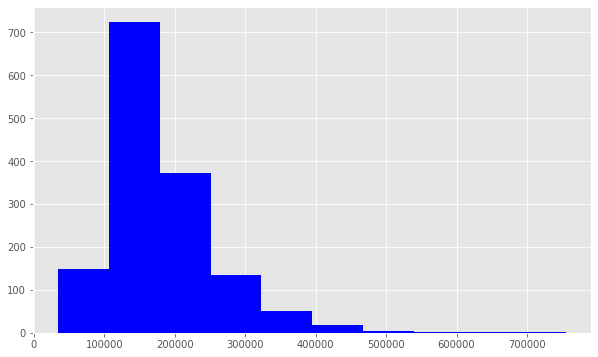

In [14]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()


 Skew is: 0.12133506220520406


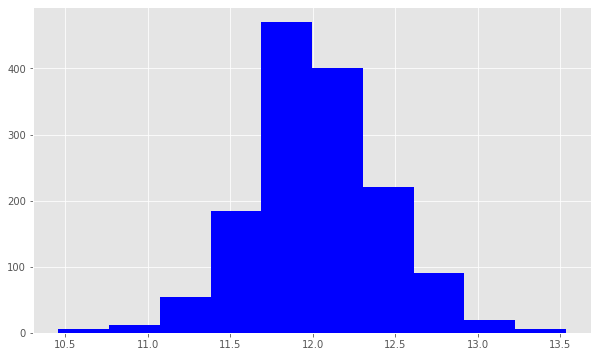

In [15]:
target = np.log(train.SalePrice)
print ("\n Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [16]:
numeric_features = train.select_dtypes(include=[np.number])
# numeric_features.dtypes
print(numeric_features.dtypes)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


In [17]:
corr = numeric_features.corr()

In [18]:
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


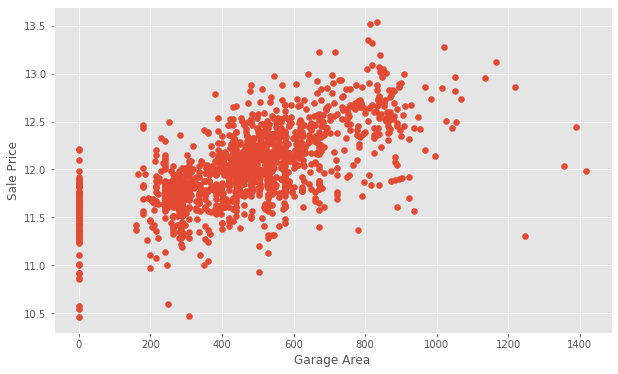

In [19]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [20]:
train = train[train['GarageArea'] < 1200]

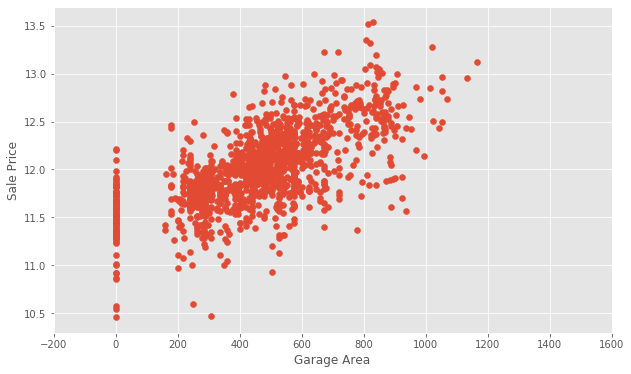

In [21]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600)     # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [22]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
#nulls
print(nulls)

              Null Count
Feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


In [23]:
categoricals = train.select_dtypes(exclude=[np.number])
#categoricals.describe()
print(categoricals.describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      921        1309      1454      1048   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1455         1455       1455  ...       1374         1374   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1378          225       1257  ...        867          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1374       1374       1455      6    281          53     1455   
unique          5          5          3      3      4           4        9   
top            TA         TA      

In [24]:
print ("Original: \n")
print (train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [25]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)

In [26]:
print ('Encoded: \n')
print (train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


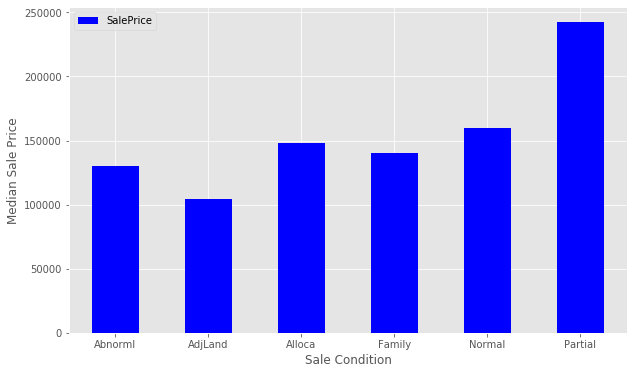

In [27]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [28]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

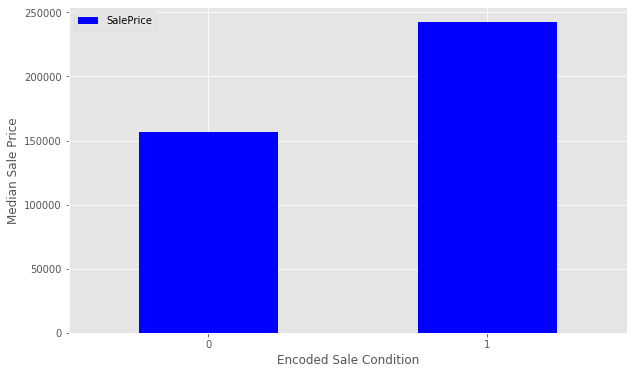

In [29]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [30]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [31]:
sum(data.isnull().sum() != 0)

0

In [32]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)


In [39]:
from sklearn.linear_model import LinearRegression
lr=linear_model.LinearRegression()

In [40]:
model=lr.fit(X_train,y_train)

In [41]:
model.score(X_test,y_test)

0.8882477709262553

In [42]:
predictions=model.predict(X_test)

In [43]:
 mean_squared_error(y_test, predictions)

0.01784179451956757

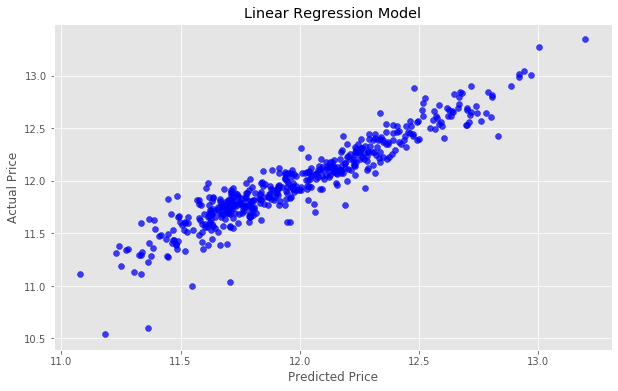

In [44]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

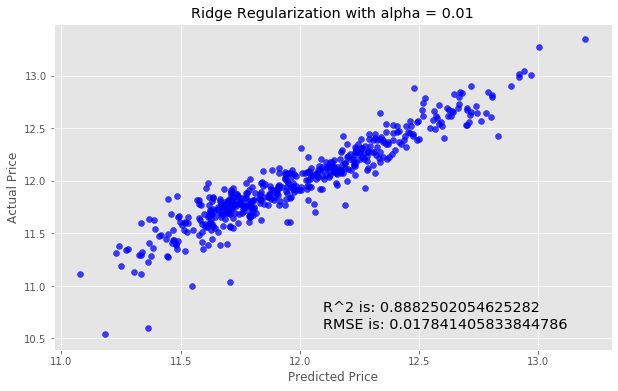

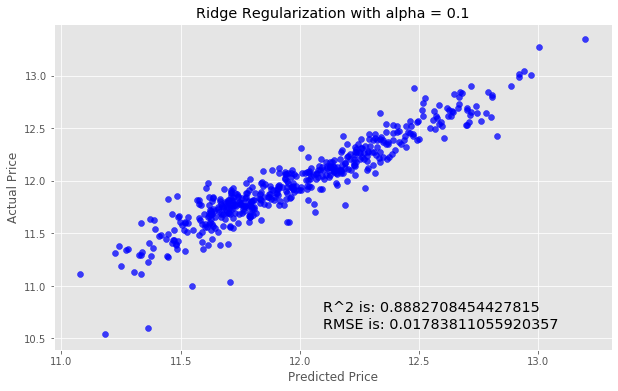

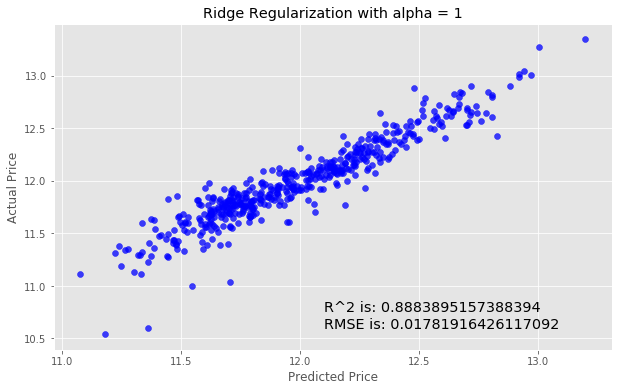

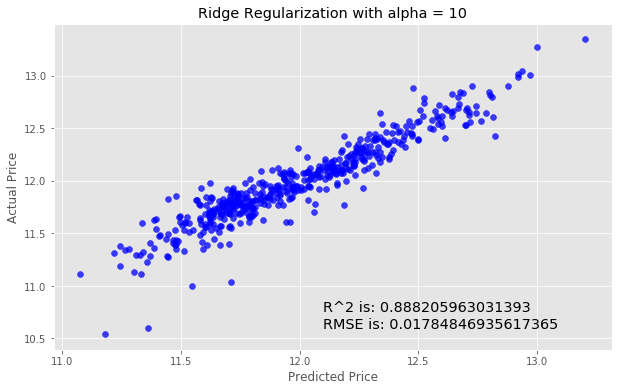

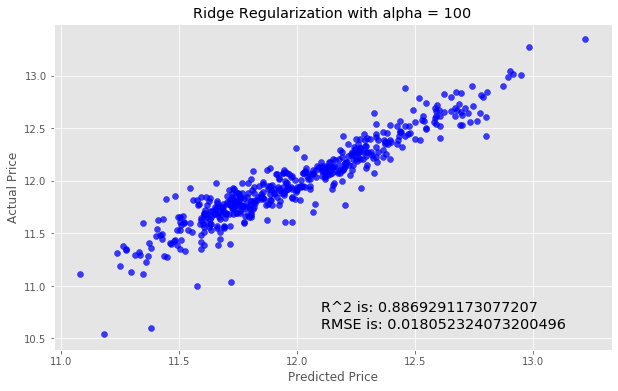

In [45]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [46]:
model.score(X_test,y_test)

0.8882477709262553

In [52]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor()

In [53]:
regr.fit(X_train,y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [54]:
regr.score(X_test,y_test)

0.8642170447359162

In [56]:
from sklearn.tree import DecisionTreeRegressor
dec=DecisionTreeRegressor()

In [57]:
dec.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [58]:
dec.score(X_test,y_test)

0.727662120219586

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
gra=GradientBoostingRegressor()

In [62]:
gra.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
gra.score(X_test,y_test)

0.9015673399462192

In [66]:
prediction=gra.predict(X_test)

In [65]:
submission=pd.DataFrame()
submission['Id']=test.Id

In [67]:
feats = test.select_dtypes(
    include=[np.number]).drop(['Id'], axis=1).interpolate()

In [68]:
predictions=gra.predict(feats)

In [69]:
final_predictions=np.exp(predictions)

In [70]:
predictions[:10]

array([11.7920179 , 12.01287438, 12.14846373, 12.12085925, 12.16289151,
       12.09380116, 12.06219623, 12.01628692, 12.06959322, 11.67167572])

In [71]:
final_predictions[:10]

array([132192.95290092, 164863.70399624, 188803.8138639 , 183663.25961848,
       191547.57943718, 178760.31410054, 173198.95229728, 165427.26958041,
       174484.85354886, 117204.519886  ])

In [72]:
submission['SalePrice']=final_predictions
submission.head()

,Id,SalePrice
0,1461,132192.952901
1,1462,164863.703996
2,1463,188803.813864
3,1464,183663.259618
4,1465,191547.579437


In [ ]:
submission.to_csv('submission')